In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

### Apr 19-21th

使用600+600+600的pattern训练PV_NET_2和PV_NET_6，在ab14和ab13,效果不好，最后都是止步于20-30。

### Apr 15-17th

用deep=1的abtree训练PVNET6最后获得-65的网络，保存于“PV_NET_6-17-9315381-m65.pkl”，对应的日志是ab08.

ab07是原有超参数自己训练自己的网络, ab06想不起来了。

下面要看从-65开始，不同的训练方法有没有差异，首先从试deep开始。

File|Deep|Time per epoch|Time per benchmark
:--:|:--:|:------------:|:----------------:
ab09|1   |21s           |11m15s
ab09|2   |68s           |12m47s
ab09|3   |117s          |12m54s
ab09|4   |314s          |12m30s
ab09|5   |1025s         |12m3s

<IPython.core.display.Javascript object>


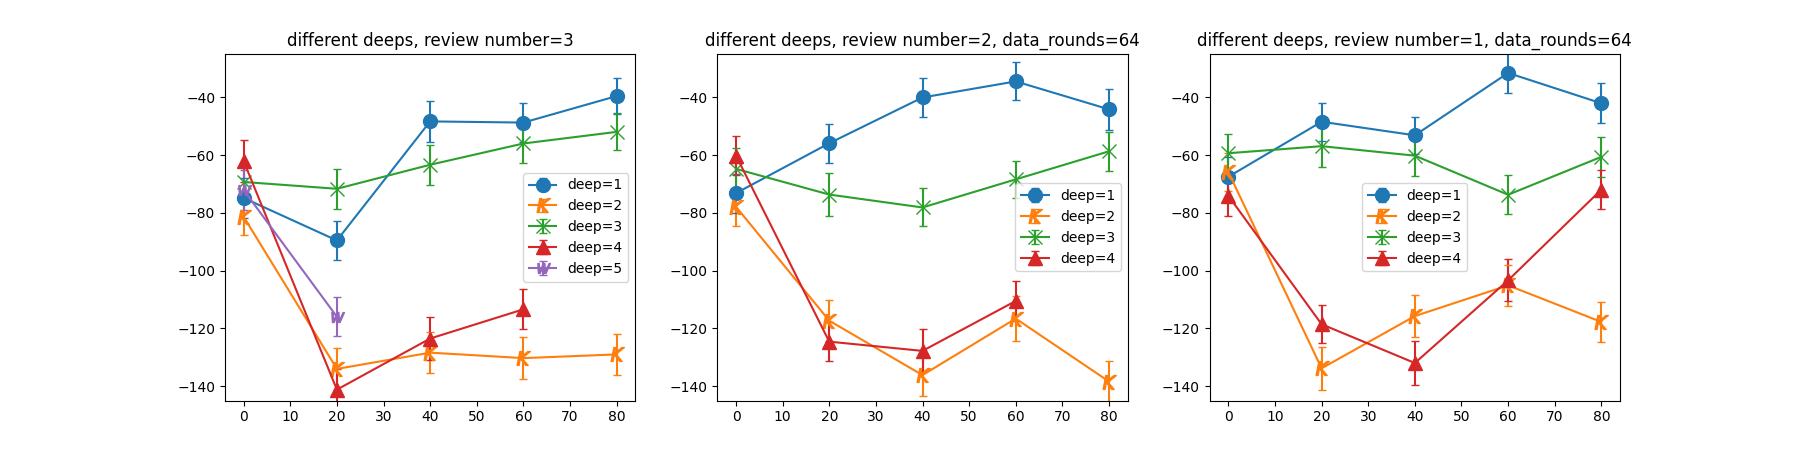

In [48]:
#review_num=3, ab09
xs=[0,20,40,60,80]
d1=[-74.86,-89.57,-48.34,-48.75,-39.57];e1=[6.89,6.67,7.09,6.63,6.34]
d2=[-81.37,-134.06,-128.43,-130.32,-129.04];e2=[6.38,7.37,7.16,7.26,7.22]
d3=[-69.32,-71.68,-63.36,-55.99,-51.97];e3=[6.68,7.00,6.89,6.69,6.42]
d4=[-62.09,-141.24,-123.54,-113.42];e4=[7.25,7.09,7.38,6.91]
d5=[-72.11,-116.00];e5=[6.85,6.77]

#review_num=1, ab10
f1=[-67.51,-48.46,-53.16,-31.56,-42.07];g1=[6.98,6.50,6.40,6.92,6.89]
f2=[-65.89,-133.86,-115.76,-105.13,-117.79];g2=[6.55,7.39,7.21,7.12,6.85]
f3=[-59.36,-56.92,-60.21,-73.74,-60.62];g3=[6.73,7.10,6.97,6.69,6.86]
f4=[-74.11,-118.59,-132.02,-103.38,-71.96];g4=[6.94,6.65,7.50,7.23,6.87]

#review_num=2, ab11
h1=[-73.20,-55.91,-40.06,-34.49,-44.17]
i1=[6.71,6.74,6.67,6.59,7.09]
h2=[-77.90,-117.36,-136.20,-116.63,-138.43]
i2=[6.71,7.20,7.31,7.88,7.25]
h3=[-64.79,-73.68,-78.15,-68.42,-58.70]
i3=[7.21,7.41,6.57,6.35,6.70]
h4=[-60.20,-124.62,-127.82,-110.53]
i4=[6.86,6.67,7.41,6.90]

ds=[d1,d2,d3,d4,d5]
es=[e1,e2,e3,e4,e5]
fs=[f1,f2,f3,f4]
gs=[g1,g2,g3,g4]
hs=[h1,h2,h3,h4]
iss=[i1,i2,i3,i4]


labels=["deep=1","deep=2","deep=3","deep=4","deep=5"]
markers=['o','$K$','x','^','$W$']

fig=plt.figure(figsize=[6*3,6/4*3],dpi=100)
ax=fig.subplots(1,3)
ax[0].set_ylim(-145,-25)
ax[1].set_ylim(-145,-25)
ax[2].set_ylim(-145,-25)

for i in range(len(ds)):
   ax[0].errorbar(xs[0:len(ds[i])],ds[i],yerr=es[i],capsize=3,label=labels[i],marker=markers[i],ms=10)
ax[0].legend()
ax[0].title.set_text('different deeps, review number=3')

for i in range(len(fs)):
   ax[1].errorbar(xs[0:len(hs[i])],hs[i],yerr=iss[i],capsize=3,label=labels[i],marker=markers[i],ms=10)
ax[1].legend()
ax[1].title.set_text('different deeps, review number=2, data_rounds=64')

for i in range(len(fs)):
   ax[2].errorbar(xs[0:len(fs[i])],fs[i],yerr=gs[i],capsize=3,label=labels[i],marker=markers[i],ms=10)
ax[2].legend()
ax[2].title.set_text('different deeps, review number=1, data_rounds=64')

#fig.show()

### Apr 10-11th

__不同的深度会对训练效率有什么影响，马中水效应到底存不存在？每加深一层运算复杂度增加多少？__

File     |Deep|Time per epoch|Ratio against deep-1|Time per benchmark
:-------:|:--:|:------------:|:------------------:|:----------------:
ab_deep_1|1   |20s           |-                   |11m2s
ab_deep_2|2   |62s           |62/20=3.1           |12m44s
ab_deep_3|3   |139s          |139/62=2.2          |12m20s
ab_deep_4|4   |341s          |341/139=2.5         |12m24s
ab_deep_5|5   |1208s         |1208/341=3.5        |12m18s

上表中比较重要的是“Ratio against deep-1”，它表示了每增加一层搜索深度搜索量翻几倍，我们看到从1到2的过程中，由于此时还没有剪纸发生，所以这个比例是3.1, 但之后2到3、3到4就有剪纸了，所以下降到了2.多。使用这个数据我们可以有效地估计不同深度的时间。上表中的“Time per benchmark”只是确保不要有编程错误（具体地说，训练时的deep不要不小心被带到测试中），时间都差不多是正常的、正确的。

上表中并没有看到马中水效应：马中水效应应当是深度增加没有任何训练效果但是上表中看到的只有深度增加训练效果变弱。为了能清晰的展示马中水效应，我想应当从已经有一定水平的AI开始，如果观察到deep大时出现明显的退步并且很快回到随即初始化的水平，即认为是马中水效应。为了排除达到一定水平的训练方法的影响，我决定从学习deep=1的abtree的AI开始。

另外，在上表中我们知道，随即初始化时用最浅的deep无疑是最好的，我们又知道水平到30时用=1的deep就没有进步了，所以可以猜测30时用更大的deep会有进一步的进步，甚至还可以进一步猜测，在不同的水平，最佳的deep是不同的，可能是逐渐加深的。这有待进一步的实验。这里最佳即指训练效果又指训练时间。

MrAbTree使用的是玄学调参+不加断门倾向的版本，deep=1时是-27.5(4.7)，这已经足够了。

<IPython.core.display.Javascript object>


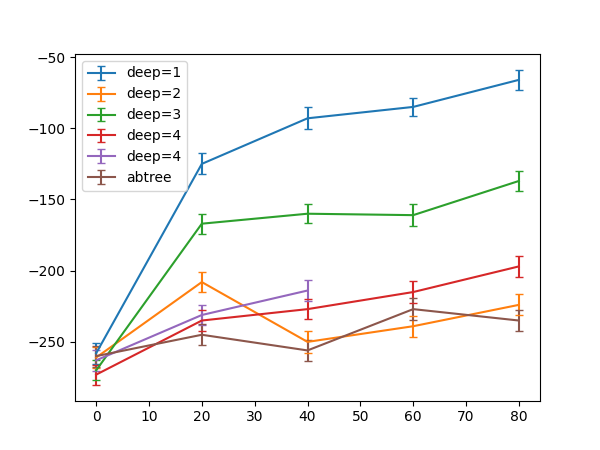

In [2]:
xs=[0,20,40,60,80]
d1=[-258,-125,-93,-85,-66]
e1=[7.2,7.4,7.6,6.5,7.1]
d2=[-261,-208,-250,-239,-224]
e2=[7.4,7.3,7.5,7.3,7.4]
d3=[-270,-167,-160,-161,-137]
e3=[7.0,7.0,6.7,7.5,7.1]
d4=[-273,-235,-227,-215,-197]
e4=[7.1,7.2,7.2,7.8,7.6]
d5=[-262.97,-231.12,-213.94]
e5=[7.2,7.34,7.52]
t1=[-260,-245,-256,-227,-235]
et=[7.3,7.5,7.5,7.7,7.7]

fig=plt.figure(figsize=[6,6/4*3],dpi=100)
ax1=fig.subplots(1)
ax1.errorbar(xs,d1,yerr=e1,capsize=3,label='deep=1')
ax1.errorbar(xs,d2,yerr=e2,capsize=3,label='deep=2')
ax1.errorbar(xs,d3,yerr=e3,capsize=3,label='deep=3')
ax1.errorbar(xs,d4,yerr=e4,capsize=3,label='deep=4')
ax1.errorbar([0,20,40],d5,yerr=e5,capsize=3,label='deep=4')
ax1.errorbar(xs,t1,yerr=et,capsize=3,label='abtree')
ax1.legend()
fig.show()

### 2021 Apr 2th

完成 MrAbTree，最navie的policy下，搜索2墩，对MrGreed 256局：-70.59 9.32

加入更多人类经验在policy函数中，引入类似于MrGreed的burden（其实就是复制粘贴），表现更差了，说明代码有给对手打牌的问题。

### 2021 Apr 3th

昨天“加入更多人类经验”的版本是写出了bug，这回改对了。仍然用"StdHands/random_0_1024.hands"测试，注意时间是在10850K上的。

deep=2      |deep=1      |4 greeds
:----------:|:----------:|:------:
47.81(17.41)|13.07(8.91) |-
(38+2)/64   |(137+17)/256|-
76min/64    |398s/256    |84s/256

### 2021 Mar 30th

刚刚写好的 alpha-beta 剪枝在 https://github.com/Gongzhu-Society/MCTS 的 alphabeta 分支中，注意不是默认分支。

https://github.com/Gongzhu-Society/MCTS/tree/alphabeta#alpha-beta-pruning 有一个简单的用法说明

下次有空应该把估值函数中变压器的问题解决，是时候解决这个历史遗留 bug 了。

### 2021 Apr 1th

alphabeta pruning 已经写入 MrZeroTreeSimple。算分函数的 C10 问题也解决了。更新在 MrIfOffline 的 alphabeta 分支中，在github上合并再拉取即可。注意合并时看一下我改了哪里。

我还改了 four_cards_oh 中 diffuse 的 index，所以之前的神经网络不能用了，而且由于 52 变成了 54,所以 prepare_ohs 对齐输入的部分要调整。

在我的 1650 上测试，sample_b/k保持之前的 5/0，search_deep=2，打64x2局用了58min，43(16)，而mcts在只搜索一层时是37(之前的数据)。原来MCTS在2080Ti上打512x2用了14min。变慢了，32倍。

原来的程序在1650上占用率应该有50%，现在的ab剪纸只有可怜的8%，说明它内存和cpu开销更高，这解释了为什么这么慢。之后再改吧。

ScenarioGen曾经有一个排列组合的问题我也改过来了。

3070上的MCTS和SCenarioGen我都已经更新了。

但是 benchmark 结果不理想，理论上讲，mctsk=1的mcts应该和deep=1的abpruning完全等价，但实际情况却是

MCTS(mcts_k=1, sample_b=5)|abpruning(deep=1)|deep=2     |deep=3
:------------------------:|:---------------:|:---------:|:---------:
35.39(4.86)               |24.46(4.71)      |40.41(4.75)|31.94(4.45)

测试使用的投icml的37分的网络和"StdHands/random_0_1024.hands". 说明有奇偶层的问题。